In [3]:
import numpy as np
import pandas as pd

In [4]:
import warnings
warnings.simplefilter("ignore")

In [5]:
athletes_df = pd.read_excel('./Athletes.xlsx')
EntriesGender_df = pd.read_excel('./EntriesGender.xlsx')
Teams_df = pd.read_excel('./Teams.xlsx')
Coaches_df = pd.read_excel('./Coaches.xlsx')
Medals_df = pd.read_excel('./Medals.xlsx')

In [6]:
athletes_df.head()


,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [7]:
EntriesGender_df.head()


,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [8]:
Teams_df.head()


,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [9]:
Coaches_df.head()


,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [10]:
Medals_df.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
EntriesGender_df = EntriesGender_df.sort_values('Total', ascending = False)

In [13]:
EntriesGender_df.head()

,Discipline,Female,Male,Total
4,Athletics,969,1072,2041
36,Swimming,361,418,779
20,Football,264,344,608
29,Rowing,257,265,522
24,Judo,192,201,393


<Figure size 432x288 with 0 Axes>

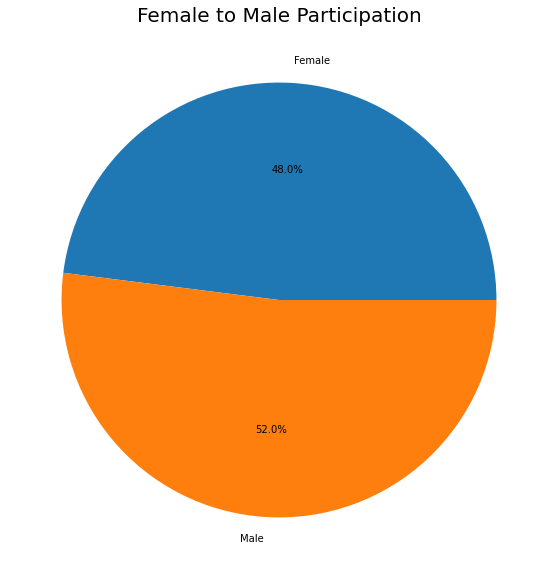

In [14]:
fem = sum(EntriesGender_df['Female'])
male = sum(EntriesGender_df['Male'])
series = [fem, male]
names=['Female', 'Male']
fig=plt.figure()
fig =  plt.figure(figsize = (10, 10))
fig.set_facecolor('White')
plt.pie(series, labels=names, autopct='%1.1f%%')
plt.title('Female to Male Participation', fontsize=20)
plt.show()

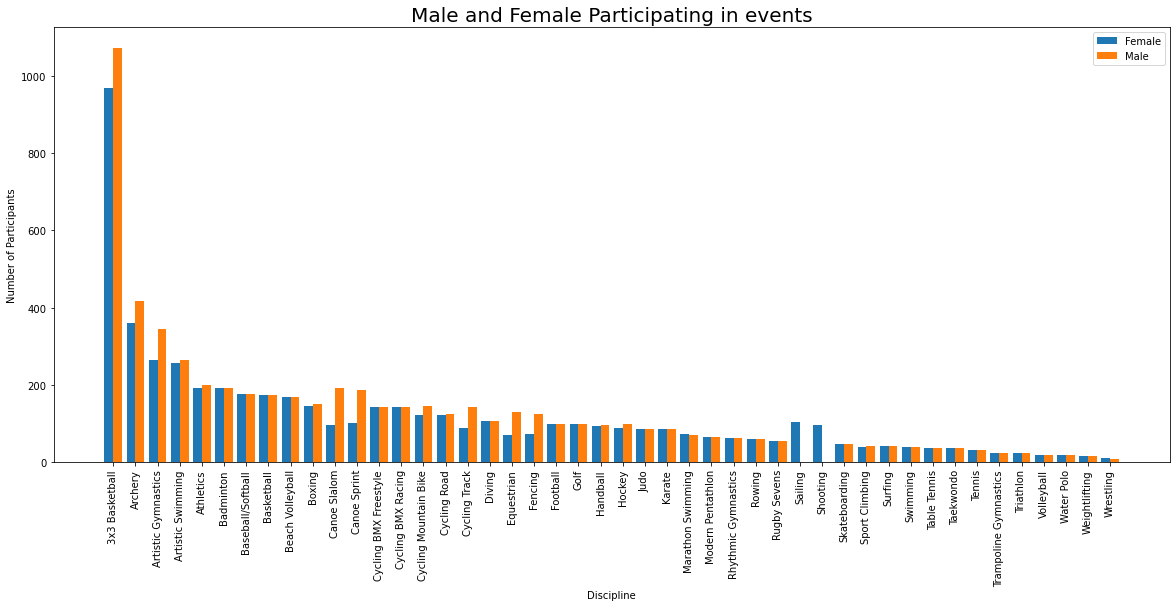

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

Disc = EntriesGender_df.groupby('Discipline')
x = [Discipline for Discipline, df in Disc]
female = EntriesGender_df.Female
male = EntriesGender_df.Male
plt.figure(figsize=(20,8))
X_axis = np.arange(len(x))
plt.bar(X_axis - 0.2, female, 0.4, label = 'Female')
plt.bar(X_axis + 0.2, male, 0.4, label = 'Male')
plt.xlabel("Discipline",size=10)
plt.ylabel("Number of Participants")
plt.xticks(X_axis,x,rotation='vertical')
plt.title("Male and Female Participating in events", fontsize=20)
plt.legend()
plt.show()

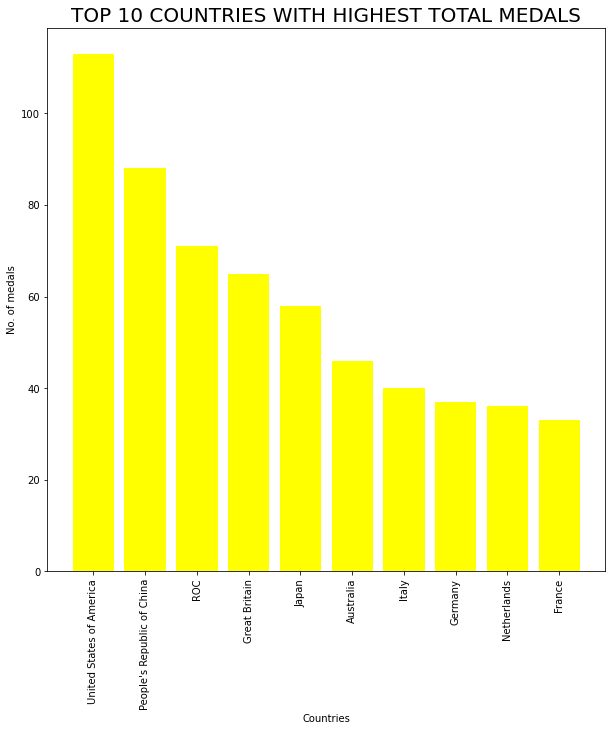

In [16]:
top_10 = Medals_df.sort_values('Rank by Total').head(10)
fig = plt.figure(figsize = (10, 10))
plt.bar(top_10['Team/NOC'], top_10['Total'], width=0.8, color='yellow')
plt.title('TOP 10 COUNTRIES WITH HIGHEST TOTAL MEDALS', fontsize=20)
plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.ylabel('No. of medals')
plt.show()

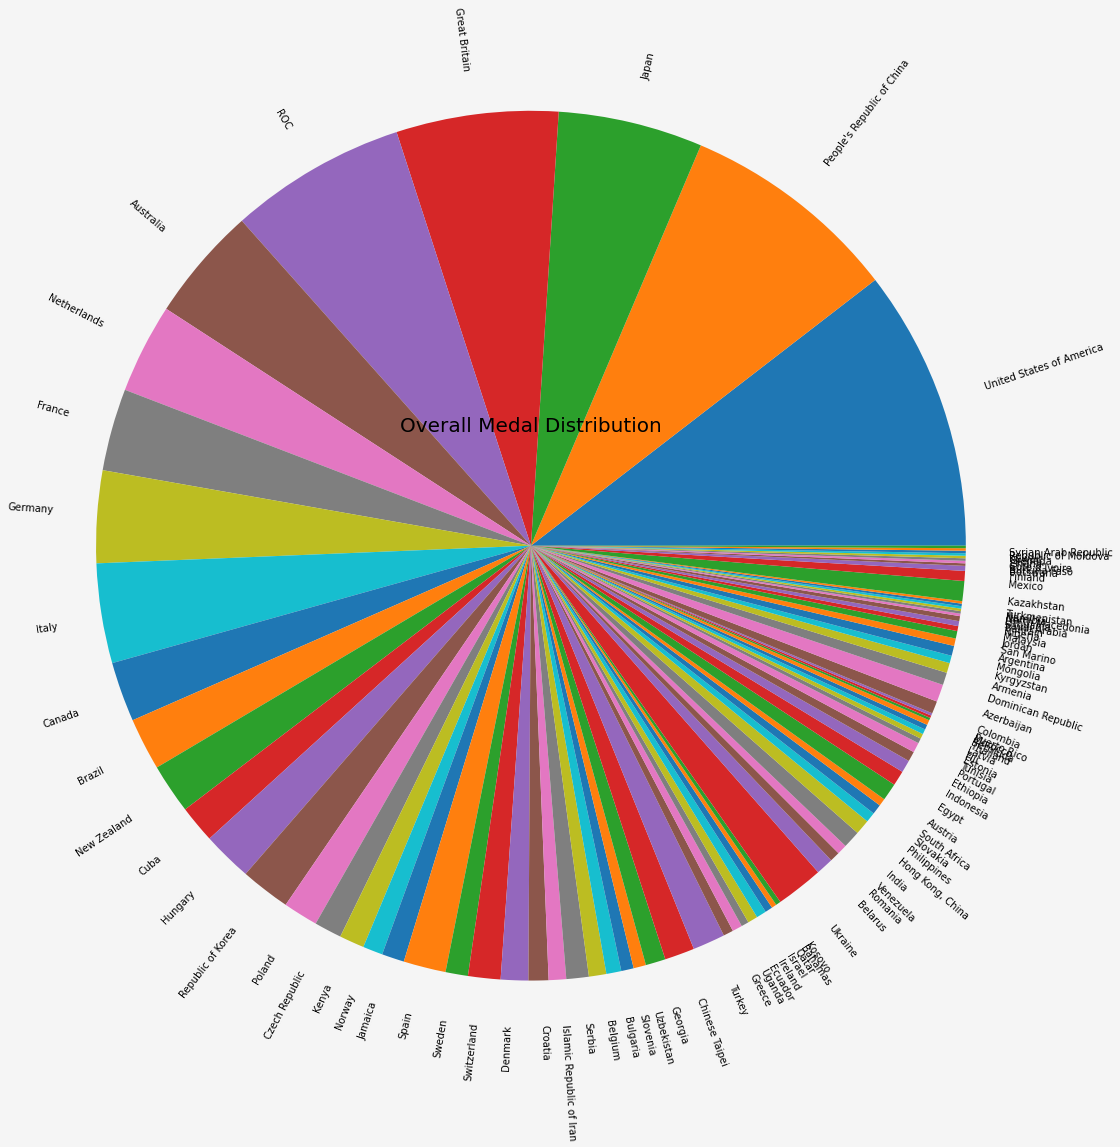

In [17]:
fig = plt.figure()
fig.set_facecolor('Whitesmoke')
plt.pie(Medals_df['Total'], labels=Medals_df['Team/NOC'], radius=5, rotatelabels=90)
plt.title('Overall Medal Distribution', fontsize=20)
plt.show()

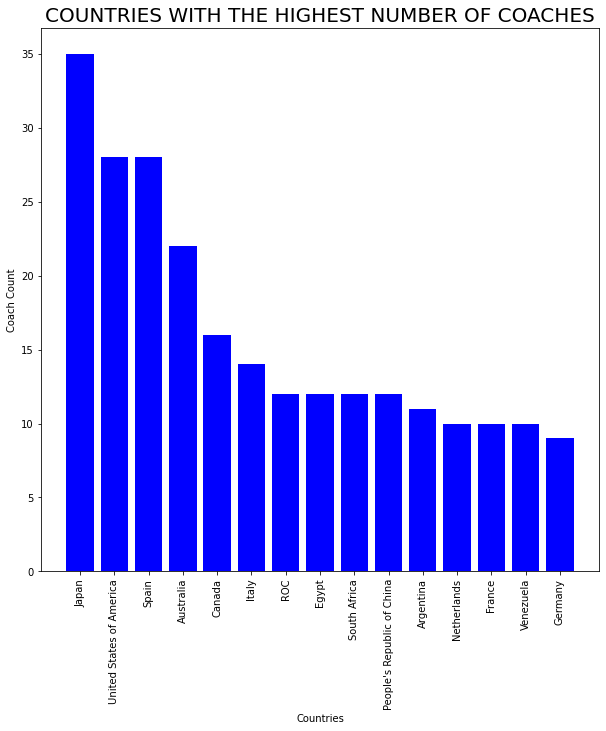

In [18]:
num_coa = Coaches_df.groupby('NOC').size()
num_coa=num_coa.to_frame('Count') 
fig =  plt.figure(figsize = (10, 10))
num_coa=num_coa.sort_values('Count', ascending=False).head(15)
plt.bar(num_coa.index.values, num_coa['Count'], color='Blue')
plt.title('COUNTRIES WITH THE HIGHEST NUMBER OF COACHES', fontsize=20)
plt.xlabel('Countries')
plt.ylabel('Coach Count')
plt.xticks(rotation=90)
plt.show()

##### Wordcloud of athletes participated

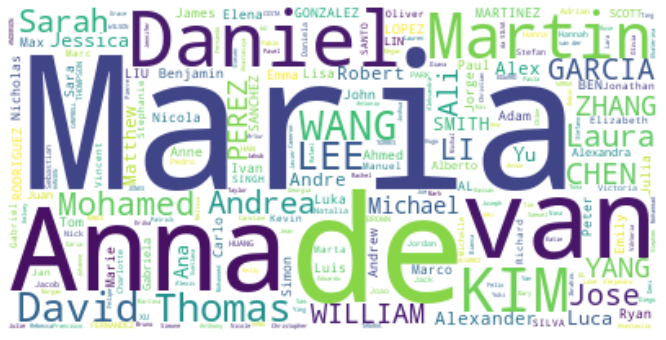

In [20]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in athletes_df.Name)
wordcloud = WordCloud(max_words=300, background_color="white").generate(text)
plt.figure(figsize=(30,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()